# Goals for this Project

- [x] Import the data
- [x] Drop the Null values
- [x] Drop the index column
- [x] Check out the count and types for genres
- [x] Check out value counts per artists
- [x] Do a groupby per artist
    - [x] Figure out way to loop through songs for each artist
- [x] Integrate fuzzywuzzy to delete duplicate songs based on song name matching of a certain percentage to avoid bias
    - [x] Write loop that enables to compare two songs and if the value is higher than a certain percentage, discard that one. If it's not, then keep it and move along.
- [x] Run data cleaning measures, cleaning lyrics of stop words common to music (chorus, intro, outro, bridge, etc.)
- [x] Do a train, test, split on the data for random sample and test data to work with
- [x] Use Scikit and check out how to run Machine Learning models on train and test data
- [x] Check out percentages
- [ ] Tweak ML Models based on outcome?
- [x] Report findings

# Data Verification

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process

In [2]:
#reading in the lyrics dataset
lyrics = pd.read_csv('lyrics.csv')

In [3]:
#checking out the first few lines
lyrics.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
#checking if there is anything out of the ordinary in terms of consistency
#we see that there are almost 100,000 songs that do not have lyrics, so we can get rid of those
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [5]:
#dropping any rows that have no lyrics
lyrics = lyrics.dropna()

In [6]:
#checking to make sure that all the empty rows were dropped and it looks like they were
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266556 entries, 0 to 362236
Data columns (total 6 columns):
index     266556 non-null int64
song      266556 non-null object
year      266556 non-null int64
artist    266556 non-null object
genre     266556 non-null object
lyrics    266556 non-null object
dtypes: int64(2), object(4)
memory usage: 14.2+ MB


In [7]:
# lyrics = lyrics.drop(columns=['index'])

In [8]:
#using to get an idea of range of years we have in this data set and it seems to be mostly from 2000's
lyrics.year.describe()

count    266556.000000
mean       2007.654909
std          10.115249
min          67.000000
25%        2006.000000
50%        2007.000000
75%        2010.000000
max        2016.000000
Name: year, dtype: float64

In [9]:
#checking all the unique genres in the dataset. It seem there are about 11 and one Not Available
genres = lyrics['genre'].unique()
print(genres)

['Pop' 'Hip-Hop' 'Not Available' 'Rock' 'Metal' 'Other' 'Country' 'Jazz'
 'Electronic' 'Folk' 'R&B' 'Indie']


In [10]:
#checking out how many songs belong to each genre. It seems like Rock accounts for about 40% of the dataset
genres_count = lyrics.genre.value_counts()
print(genres_count)

Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: genre, dtype: int64


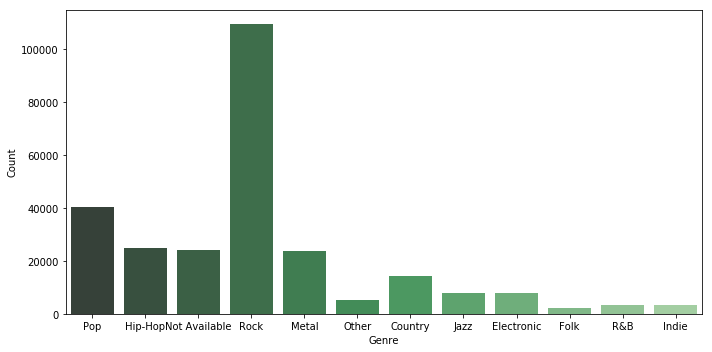

In [11]:
#putting it in a plot just to get an idea
plt.figure(figsize=(10,5))
sns.countplot(x='genre', data=lyrics, palette='Greens_d')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()

# Data Cleaning

In [ ]:
#dropping rows of genres that are listed as "Not Available"
for index, row in lyrics.iterrows():
    print(index, row['genre'])
    if row['genre'] == "Not Available" or row['genre'] == "Other":
        lyrics = lyrics.drop(index, axis=0)

In [13]:
print(len(lyrics))
lyrics.genre.value_counts()

237426


Rock          109235
Pop            40466
Hip-Hop        24850
Metal          23759
Country        14387
Jazz            7970
Electronic      7966
R&B             3401
Indie           3149
Folk            2243
Name: genre, dtype: int64

In [14]:
#checking how many artists songs are in the dataset. It seems like there may be a lot of duplicates
#I don't think there could be as many as 450 to 700 songs from each of these artists

artists_group = lyrics.groupby("artist")
print(len(artists_group.artist.count()))
# artists_group.count().sort_values(by='song', ascending=False).head(50)

10104


In [15]:
#checking to see if there are duplicate songs in the dataset
dolly = lyrics[lyrics['artist'] == 'dolly-parton']
# dolly.sort_values(by = 'song').head(50)

In [16]:
#checking output for the groups. Looks to output the indexes for the songs. Will use this for iterating through
#the song names and removing duplicates
artists = artists_group.apply(lambda x: x.sort_values("song"))
# artists

In [ ]:
#Checking output sample
artists.loc['childish-gambino'].lyrics

In [18]:
#test case for iterating through artists songs
# lastsong = ""
# for index,row in artists.loc['dolly-parton'].iterrows():
#     currentsong = row.song
#     print(currentsong)
#     print(lastsong)
#     if fuzz.ratio(currentsong, lastsong) >= 85:
#         lastsong = row.song
#         lyrics = lyrics.drop(index[1], axis=0)
#     print(fuzz.partial_ratio(currentsong, lastsong))
    
#     print(lastsong)


In [19]:
# for name, group in artists_group:
#     if len(group) > 1:
#         for row in group:
#             print(row)
# #             song1 = lyrics
# #             song2 = row.song
# #             if fuzz.ratio(song1, song2) > 80:
# #                 lyrics = lyrics.drop(lyrics.lyrics.iloc[index])
#     print(group)
    
lastsong = ""
for index,row in artists.iterrows():
    currentsong = row.song
#     print(index[1], currentsong)
#     print(lastsong)
    if fuzz.ratio(currentsong, lastsong) >= 85:
#         lastsong = row.song
        lyrics = lyrics.drop(index[1], axis=0)
#     print(fuzz.partial_ratio(currentsong, lastsong))
    lastsong = row.song
#     print(lastsong)
# len(artists['dolly-parton'])

In [20]:
len(lyrics)

231959

In [21]:
#This is to add genres to their own data slices
#could be used later for wordcloud perhaps

#not_available = lyrics[lyrics['genre'] == 'Not Available']
#print(not_available.head(20))

In [22]:
#print(not_available.sort_values(by='artist').head(20))

In [23]:
lyricsep = lyrics['lyrics']
lyricsep2 = lyrics['lyrics']

In [24]:
type(lyricsep)

pandas.core.series.Series

In [25]:
#lyricsep=pd.DataFrame(lyricsep)

In [ ]:
print(len(lyricsep))
lyricsep[346759]

In [27]:
#lyricsep[425]

In [28]:
replace = ["r/'\p{P}/'","r/'VERSE/'", "r/'Verse'","r/'CHORUS/'", "r/'Chorus'","r/'INSTRUMENTAL/'", "r/'Instrumental'","r/'x\d/'","r/'\dx/'","r/'X\d/'","r/'\d]/'","r/'BRIDGE/'", "r/'Bridge'","r/'HOOK'", "r/'Hook'","r/'Pre/'","r/'INTRO/'", "r/'Intro'","r/'OUTRO/'", "r/'Outro'","r/'\d/'","r/'^\w/'"]

In [29]:
#lyricsep4 = lyricsep.replace('Chorus', '')
#lyricsep4[8]

In [ ]:
#we are only taking away the \n and keeping this separate in case or for testing function
lyricsep2 = [re.sub(r'\n',' ', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'x\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'\dx','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'X\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'\d','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'[^\w ]','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Chorus','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'CHORUS','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Verse','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'VERSE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'INSTRUMENTAL','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Instrumental','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Bridge','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'BRIDGE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Hook','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'HOOK','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Intro','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'INTRO','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Outro','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'OUTRO','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'Pre','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
lyricsep2 = [re.sub(r'PRE','', i) for i in lyricsep2]
# lyricsep2 = pd.Series(lyricsep2)
print(lyricsep[2])

In [ ]:
lyricsep2[220555]

In [ ]:
lyrics = lyrics.drop('lyrics', axis=1)
lyrics.head()

In [ ]:
lyrics['lyrics'] = lyricsep2
lyrics.tail(100)

In [35]:
#function to able to strip lyrics to the bare minimum, minus 
# def lyricstrip(x):
    
#     replacew = [r'\p{P}',r'Verse',r'verse',r'VERSE',r'chorus',r'Chorus',r'CHORUS',r'Instrumental',r'instrumental',r'INSTRUMENTAL',r'x\d',r'\dx',r'X\d',r'\dX',r'Bridge',r'Hook',r'HOOK',r'Pre',r'Intro',r'intro',r'INTRO',r'outro',r'Outro',r'OUTRO',r'\d',r'^A-Za-z0-9+']

#     x = [re.sub(r'\n',' ', i) for i in x]
#     x = pd.Series(x)
# #    x= [re.sub(j, '',i, flags=re.IGNORECASE) for j in replace for i in x]
# #    x = pd.Series(x)
# #    return x
#     for j in replacew:
#         for i in x:
#             re.sub(j,'',i)
#     return pd.Series(x)

In [66]:
lyrics.genre.value_counts()

Rock          106764
Pop            39471
Hip-Hop        24047
Metal          23303
Country        14151
Jazz            7822
Electronic      7816
R&B             3324
Indie           3107
Folk            2154
Name: genre, dtype: int64

In [ ]:
rock = lyrics[lyrics['genre'] == "Rock"]
rockindex = rock.index
# rockindex

In [ ]:
import random

rockshort = random.sample(list(rockindex), 40000)
rockshort

In [91]:
for index, row in lyrics.iterrows():
    if (row.genre == "Rock" and index not in rockshort):
        lyrics = lyrics.drop(index, axis=0)

In [92]:
lyrics.genre.value_counts()

Pop           35385
Rock          34721
Hip-Hop       21433
Metal         20488
Country       12461
Jazz           6850
Electronic     6795
R&B            2953
Indie          2833
Folk           1735
Name: genre, dtype: int64

In [93]:
lyrics.to_csv("lyricstwo.csv", index=False)

# Data Processing and SVM Setup

In [3]:
lyricstwo = pd.read_csv("lyricstwo.csv")

In [4]:
lyricstwo['genre_label'] = lyricstwo['genre']
print(len(lyricstwo))
lyricstwo.head()

145654


,index,song,year,artist,genre,lyrics,genre_label
0,41673,rock-island-line,2005,golden-gate-quartet,Jazz,Now this heres a story about the Rock Island L...,Jazz
1,41678,stormy-weather,2005,golden-gate-quartet,Jazz,Dont know why Theres no sun up in the sky Stor...,Jazz
2,41682,preacher-and-the-bear,2005,golden-gate-quartet,Jazz,The preacher went out a huntin it was on one S...,Jazz
3,41686,dipsy-doodle,2005,golden-gate-quartet,Jazz,The Dipsy Doodles the thing to beware The Dips...,Jazz
4,41689,my-walking-stick,2005,golden-gate-quartet,Jazz,Without my walking stick Id go insane I cant l...,Jazz


In [5]:
lyricstwo = lyricstwo.dropna()
len(lyricstwo)

144029

In [6]:
#Iterating through the dataframe assigning numbers to each genre for classification purposes
from nltk.tokenize import word_tokenize

for index, row in lyricstwo.iterrows():
#     print(row.genre)
    if row.genre == "Pop":
        lyricstwo.genre_label[index] = 0
    elif row.genre == "Rock":
        lyricstwo.genre_label[index] = 1
    elif row.genre == "Hip-Hop":
        lyricstwo.genre_label[index] = 2
    elif row.genre == "Metal":
        lyricstwo.genre_label[index] = 3
    elif row.genre == "Country":
        lyricstwo.genre_label[index] = 4
    elif row.genre == "Jazz":
        lyricstwo.genre_label[index] = 5
    elif row.genre == "Electronic":
        lyricstwo.genre_label[index] = 6
    elif row.genre == "R&B":
        lyricstwo.genre_label[index] = 7
    elif row.genre == "Indie":
        lyricstwo.genre_label[index] = 8
    else:
        lyricstwo.genre_label[index] = 9
    
#     print(row.lyrics)
    lyricstwo.lyrics[index] = row.lyrics.lower()
    lyricstwo.lyrics[index] = word_tokenize(lyricstwo.lyrics[index])


/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/SilverSurfer/anaconda3/lib/python3.7/site-packages/

In [7]:
# lyricstwo.head(20)

In [8]:
wordfreq = {}
for index, row in lyricstwo.iterrows():
    for token in row.lyrics:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [9]:
wordfreq1 = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1], reverse=True)}
# wordfreq1

In [10]:
len(wordfreq1)

367673

In [11]:
import heapq
freq_words = heapq.nlargest(300, wordfreq1, key=wordfreq1.get)

In [12]:
lyricvector = []
for index, row in lyricstwo.iterrows():
    vector = []
    for word in freq_words:
        if word in row.lyrics:
            vector.append(1)
        else:
            vector.append(0)
    lyricvector.append(vector)
lyricstwo['lyric_vector'] = lyricvector

In [13]:
lyricvector = np.asarray(lyricvector)

In [14]:
lyricstwo['lyric_vector'] = list(lyricvector)
lyricstwo.head()

,index,song,year,artist,genre,lyrics,genre_label,lyric_vector
0,41673,rock-island-line,2005,golden-gate-quartet,Jazz,"[now, this, heres, a, story, about, the, rock,...",5,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."
1,41678,stormy-weather,2005,golden-gate-quartet,Jazz,"[dont, know, why, theres, no, sun, up, in, the...",5,"[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, ..."
2,41682,preacher-and-the-bear,2005,golden-gate-quartet,Jazz,"[the, preacher, went, out, a, huntin, it, was,...",5,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
3,41686,dipsy-doodle,2005,golden-gate-quartet,Jazz,"[the, dipsy, doodles, the, thing, to, beware, ...",5,"[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, ..."
4,41689,my-walking-stick,2005,golden-gate-quartet,Jazz,"[without, my, walking, stick, id, go, insane, ...",5,"[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, ..."


In [15]:
lyricstwo.to_csv("lyricsthree.csv", index=False)

In [16]:
#setting up our variables to use for the training and testing

X = lyricvector
y = lyricstwo['genre_label'].astype(int)

In [17]:
# Splitting up the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
#testing out Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.50
Accuracy of Logistic regression classifier on test set: 0.49


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.58
Accuracy of K-NN classifier on test set: 0.40


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.26
Accuracy of GNB classifier on test set: 0.25


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='modified-huber', shuffle=True)
sgd.fit(X_train, y_train)
print('Accuracy of SGD classifier on training set: {:.2f}'
     .format(sgd.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.2f}'
     .format(sgd.score(X_test, y_test)))s